Plotting with seaborn
=====================

``````{admonition} Overview
:class: overview

Questions:

* How can I create statistical plots in seaborn?

Objectives:

* Visualize linear relationships with seaborn.

* Visualize correlation coefficients with seaborn.

``````

In the last session we created plots using Matplotlib and learned how to make subplots and customize plots. 
In this session, we will discuss another Python visualization library called [seaborn](https://seaborn.pydata.org/). 
Seaborn is a visualization which is built on top of Matplotlib, but has plots created specifically for **statistical** visualization.

Beacause seaborn builds on Matplotlib, having a good understanding of Matplotlib will help you create better seaborn plots. 
This will be an introduction to what is possible with seaborn. We encourage you to check it out further by viewing the documentation or the [example gallery](https://seaborn.pydata.org/examples/index.html).

## Reading in the data

To begin, we read in the data that we cleanred in the previous lesson.

In [1]:

import pandas as pd

In [2]:
df = pd.read_csv("data/potts_table1_clean.csv")

In [3]:
df.head()

,Compound,log P,pi,Hd,Ha,MV,R_2,log K_oct,log K_hex,log K_hep
0,water,-6.85,0.45,0.82,0.35,10.6,0.00,-1.38,NaN,NaN
1,methanol,-6.68,0.44,0.43,0.47,21.7,0.28,-0.73,-2.42,-2.80
2,methanoicacid,-7.08,0.60,0.75,0.38,22.3,0.30,-0.54,-3.93,-3.63
3,ethanol,-6.66,0.42,0.37,0.48,31.9,0.25,-0.32,-2.24,-2.10
4,ethanoicacid,-7.01,0.65,0.61,0.45,33.4,0.27,-0.31,-3.28,-2.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Compound   37 non-null     object 
 1   log P      33 non-null     float64
 2   pi         37 non-null     float64
 3   Hd         37 non-null     float64
 4   Ha         37 non-null     float64
 5   MV         37 non-null     float64
 6   R_2        37 non-null     float64
 7   log K_oct  36 non-null     float64
 8   log K_hex  30 non-null     float64
 9   log K_hep  24 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.0+ KB


## Review - Plotting with matplotlib

Since our data seems to be read in correctly and is in order, we are ready to plot. In the paper we obtained this data from, the molecular descriptors in the table are used to fit an equation for skin permeability, or log P. In the paper in question, they fit a multi-linear model to the data.

We can repeat exactly what is in the paper. However, if we didn't know what to expect for our model one thing we might want to do is to visually inspect the relationship of log P with each variable. One way to do this easily would be with a plot. Let's review what we learned about plotting with matplotlib by creating a plot of `log P` vs. `pi`.

Text(0.5, 0, 'pi')

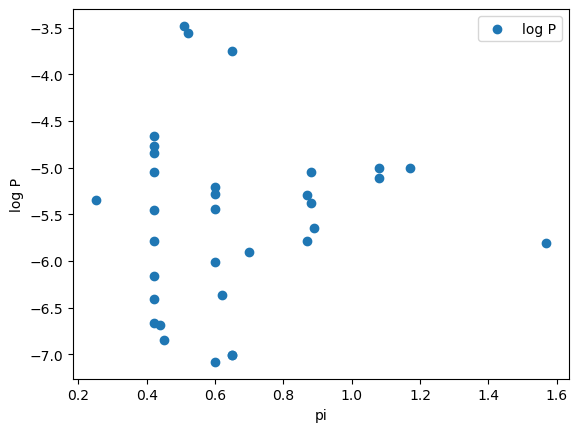

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter("pi", "log P", data=df)
ax.legend()
ax.set_ylabel("log P")
ax.set_xlabel("pi")

You might have also chosen to make this plot with the built-in plotting for pandas dataframes.

## Visualizing linear relationships with seaborn

To use the seaborn library, we begin by importing it. When seaborn is imported, it is typically shortened to `sns`. 

Seaborn has plots which will do a linear fit for us and draw that line along with our data. The simplest way to do this is for a single column using the `regplot` command.

In [6]:
import seaborn as sns

### Regplot

<IPython.core.display.Javascript object>


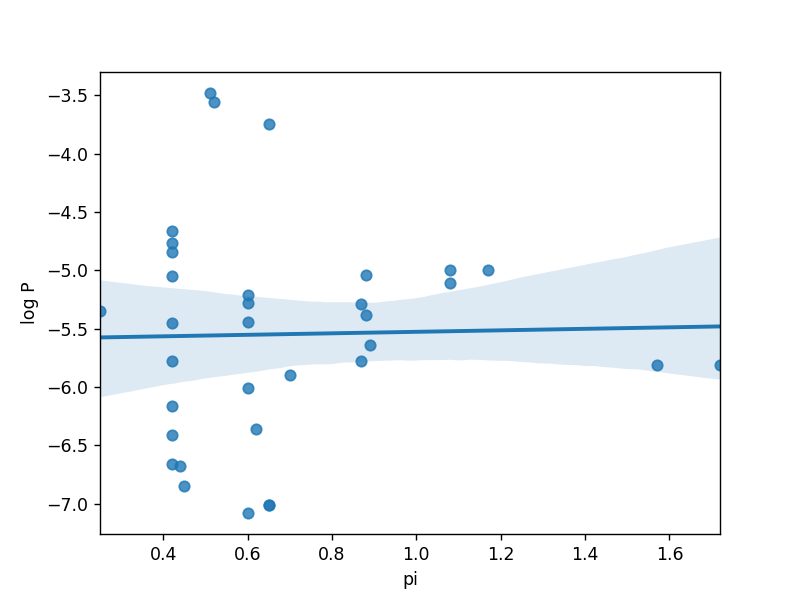

In [7]:
plt.figure()
g = sns.regplot(x="pi", y="log P", data=df)

 Notice that we must create a figure before we execute the code which creates the plot. As we mentioned earlier, seaborn in built on top of matplotlib. It uses the procedural interface to matplotlib, meaning that the seaborn figure will be drawn on top of the most recent figure axis.
 
We can combine regplot with what we learned about subplots in the previous session to create subplots showing the linear relationships.

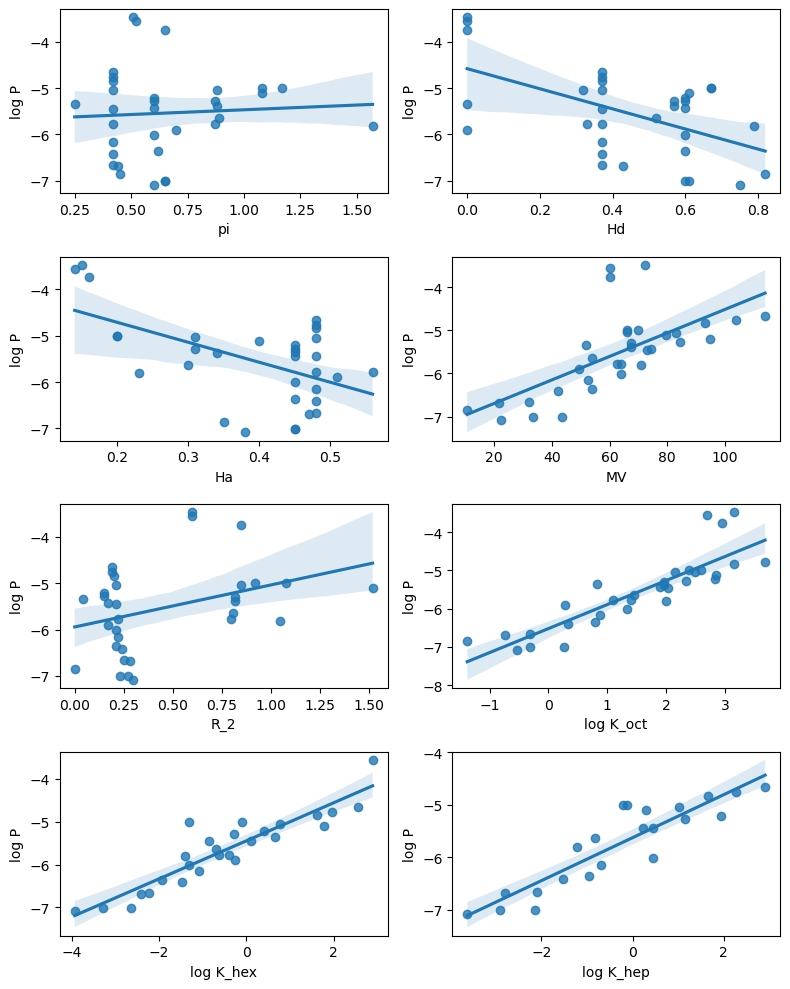

In [8]:
# Get columns which are numbers
df2 = df.select_dtypes(include="float")

# Create a figure with multiple subplots (4 rows, 2 columns)
fig, ax = plt.subplots(4, 2, figsize=(8,10))

# This flattens the array to one dimension so we can loop through it
# with a single count.
ax = ax.reshape(-1)

count = 0
for x_col in df2.columns:
    if x_col !="log P":
        axis = ax[count]
        sns.regplot(data=df2, x=x_col, y="log P", ax=axis)
        count += 1

plt.tight_layout()

### lmplot

A very similar effect will be achieved with an alternate seaborn plotting function called `lmplot`. On the surface, this plot does not appear much different.

<IPython.core.display.Javascript object>


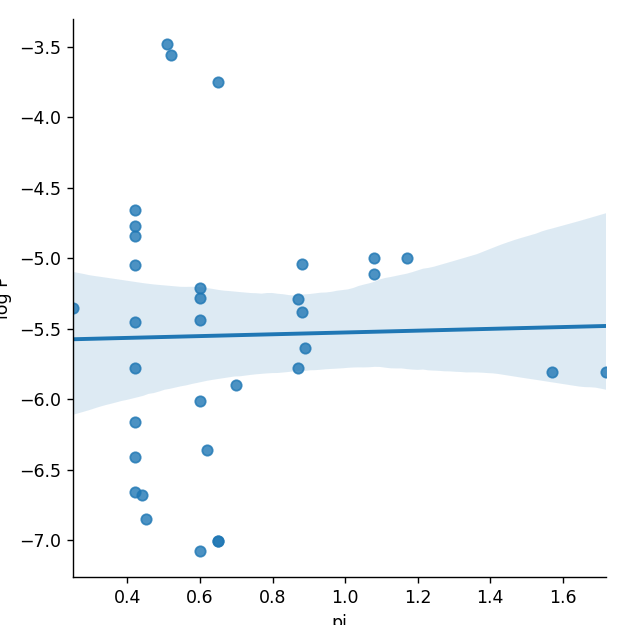

In [9]:
g = sns.lmplot(x="pi", y="log P", data=df)

Underneath the surface `lmplot` using something in seaborn called `facetgrid` which uses subplots in matplotlib. `Lmplot` allows us to quickly plot the relationship between different data sets.

Unfortunately, it's not quite as easy as it sounds. Use of `lmplot` requires that our data be what is called "tidy" or  “long-form”, meaning that we should have dataframe where each column is a variable and each row is an observation.

In [10]:
df2.head()

,log P,pi,Hd,Ha,MV,R_2,log K_oct,log K_hex,log K_hep
0,-6.85,0.45,0.82,0.35,10.6,0.00,-1.38,NaN,NaN
1,-6.68,0.44,0.43,0.47,21.7,0.28,-0.73,-2.42,-2.80
2,-7.08,0.60,0.75,0.38,22.3,0.30,-0.54,-3.93,-3.63
3,-6.66,0.42,0.37,0.48,31.9,0.25,-0.32,-2.24,-2.10
4,-7.01,0.65,0.61,0.45,33.4,0.27,-0.31,-3.28,-2.90


We can acheive this by "melting" the dataframe. When we use the `melt` function, we specify the variable of interest (`log P` for us). This will keep the log P column, while melting the others.

In [11]:
df2_melt = df2.melt(id_vars="log P")

In [13]:
df2_melt.head()

,log P,variable,value
0,-6.85,pi,0.45
1,-6.68,pi,0.44
2,-7.08,pi,0.60
3,-6.66,pi,0.42
4,-7.01,pi,0.65


In [12]:
df2_melt.tail()

,log P,variable,value
291,-5.28,log K_hep,1.16
292,-4.84,log K_hep,1.65
293,-5.21,log K_hep,1.95
294,-4.77,log K_hep,2.28
295,-4.66,log K_hep,2.91


Now we can use `lmplot` to create the previous plot in one line.
This type of plot is good for seeing the relationship between multiple variables and a variable of interest.

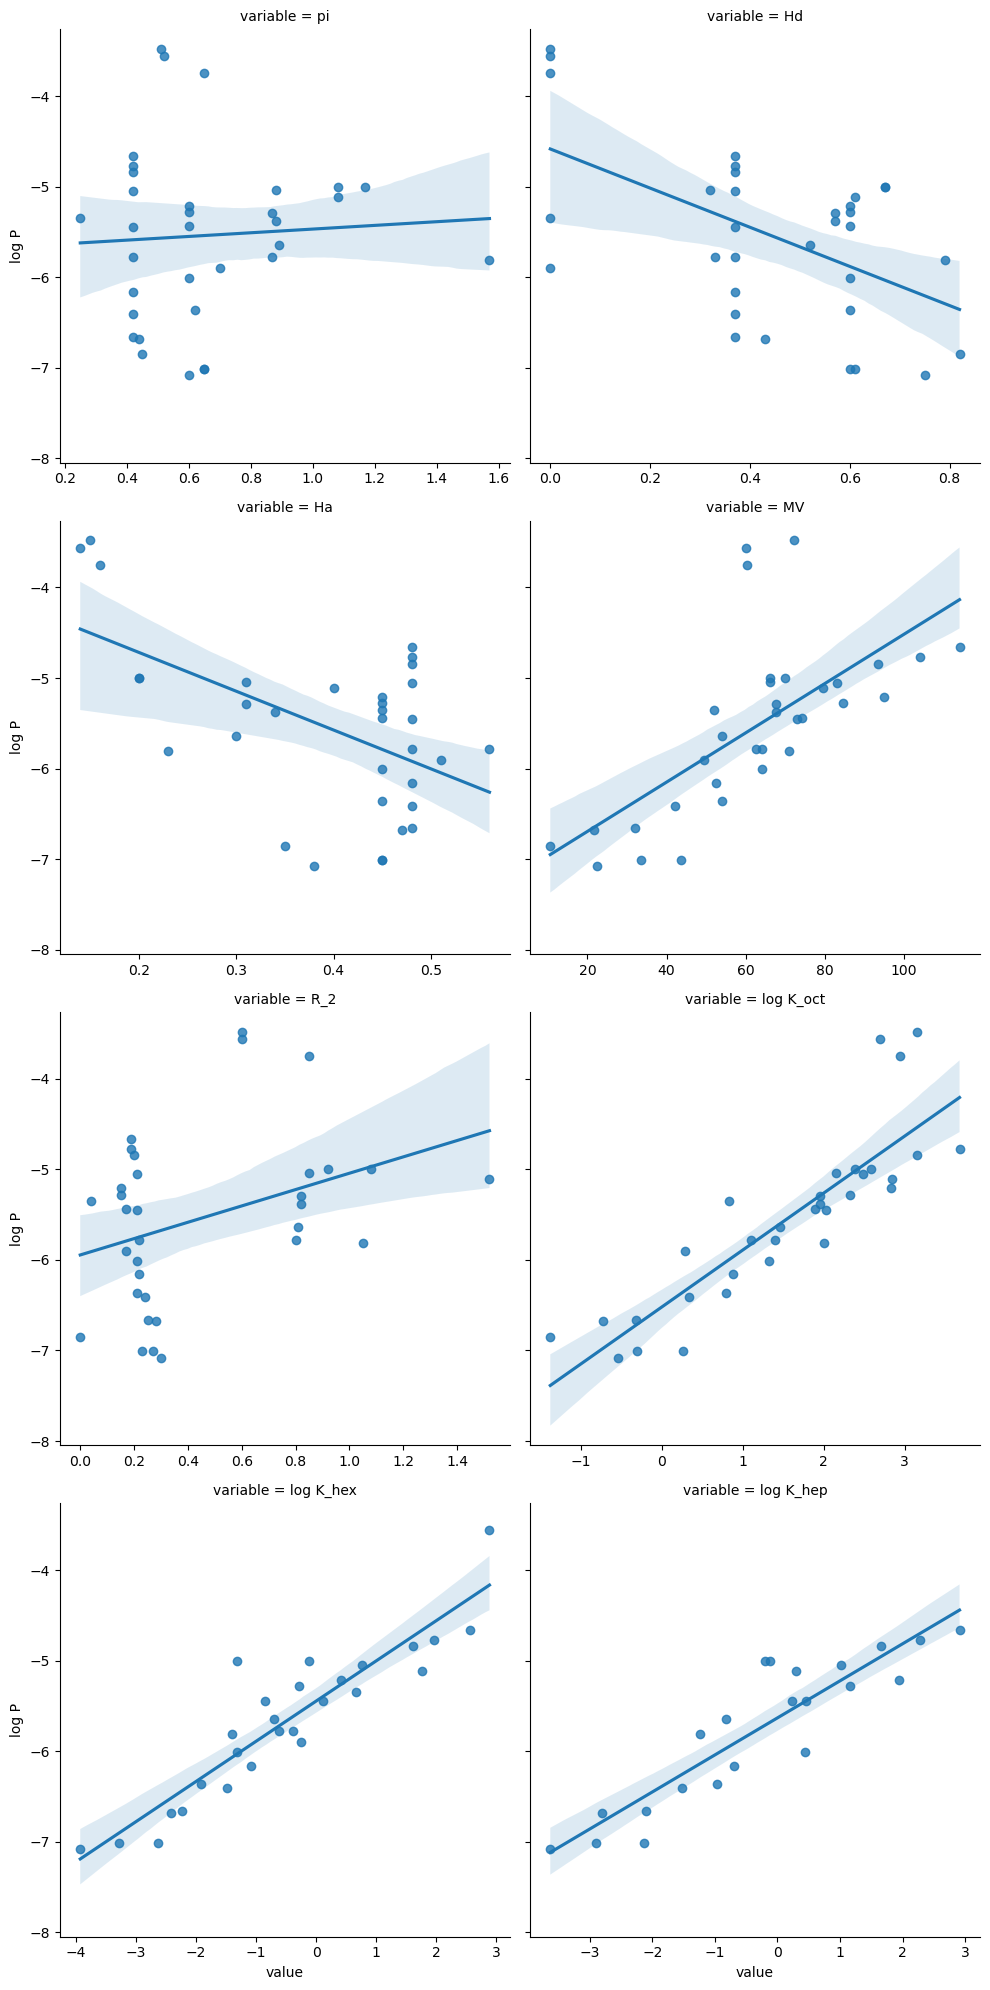

In [18]:
g = sns.lmplot(data=df2_melt, y="log P", x="value", col="variable", col_wrap=2, facet_kws={"sharex": False})

By default, the x and y range on these plots will be the same. However by using the `facet_kws={"sharex": False})` option, these will be put on different scales.

## Correlation Plots

Pandas dataframes have a `.corr` method which shows the correlation between each column.

In [14]:
df2.corr()

,log P,pi,Hd,Ha,MV,R_2,log K_oct,log K_hex,log K_hep
log P,1.000000,0.023011,-0.533354,-0.520866,0.668004,0.331424,0.865084,0.907558,0.885660
pi,0.023011,1.000000,0.432698,-0.443045,0.145430,0.809993,0.231781,-0.232893,-0.199002
Hd,-0.533354,0.432698,1.000000,0.102839,-0.068468,0.091703,-0.209763,-0.504429,-0.401620
Ha,-0.520866,-0.443045,0.102839,1.000000,0.026161,-0.602861,-0.383236,-0.156696,0.200349
MV,0.668004,0.145430,-0.068468,0.026161,1.000000,0.180332,0.910597,0.677246,0.927141
R_2,0.331424,0.809993,0.091703,-0.602861,0.180332,1.000000,0.420027,0.048637,-0.095938
log K_oct,0.865084,0.231781,-0.209763,-0.383236,0.910597,0.420027,1.000000,0.762637,0.870178
log K_hex,0.907558,-0.232893,-0.504429,-0.156696,0.677246,0.048637,0.762637,1.000000,0.889605
log K_hep,0.885660,-0.199002,-0.401620,0.200349,0.927141,-0.095938,0.870178,0.889605,1.000000


We can visualize this correlation using a heat map in seaborn.

<IPython.core.display.Javascript object>


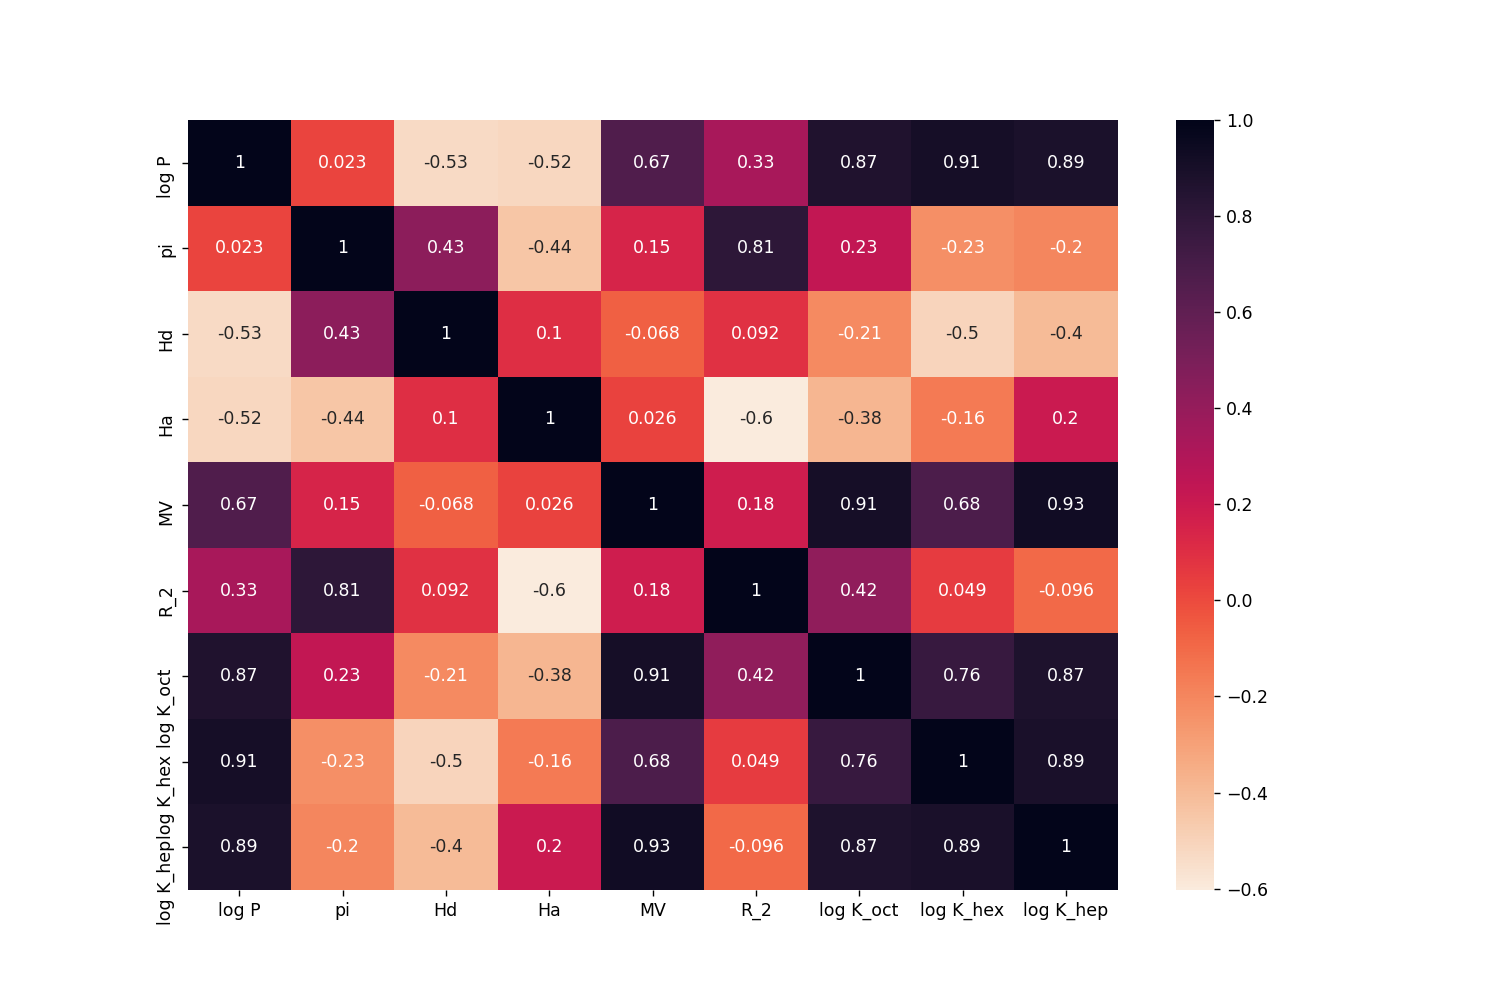

<AxesSubplot:>

In [15]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), cmap="rocket_r", annot=True)

``````{admonition} Key Points
:class: key

* Seaborn is built on top of matplotlib and can be used to easily create statistical visualizations.

* `lmplot` can create plots showing the relationship between a column of data and other columns, but the data must be "long form" for this function.

``````